# Instalacion de dependencias necesarias

In [1]:
!pip install sklearn geopandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/medellin/sivigila.csv', delimiter=';');
df['Suicidios'] = 1;
fecha = pd.to_datetime(df['sivigila_intsuicidio.ini_sin_']);
df['fecha'] = fecha;

## Refactoring (cleaning dataset)

In [4]:
# Columns to select
columns = ['sivigila_intsuicidio.edad_', 
           'sivigila_intsuicidio.sexo_',
           'sivigila_intsuicidio.nombre_barrio',
           'sivigila_intsuicidio.comuna',
           'sivigila_intsuicidio.escolarid',
           'fecha',
           'Suicidios']

df = df[columns]

columns = ['edad',
           'sexo',
           'barrio',
           'comuna',
           'escolaridad',
           'fecha',
           'suicidios']

df.columns = columns
# Changing type edad: From object to int64

df['edad'] = df['edad'].astype(str).astype(float).astype(int)

# Filtros
filtrosi = ((df['comuna']!='SIN INFORMACION')&(df['barrio']!='SIN INFORMACION'));
filtrosd = (df['escolaridad']!='SD');
df

,edad,sexo,barrio,comuna,escolaridad,fecha,suicidios
0,22,F,Santo Domingo Savio No.1,Popular,SD,2015-08-12,1
1,19,M,Villa Hermosa,Villa Hermosa,SD,2015-07-12,1
2,52,F,Los Conquistadores,Laureles,SD,2015-07-12,1
3,58,F,Las Violetas,Belen,SD,2015-06-12,1
4,32,M,Florida Nueva,Laureles,SD,2015-06-12,1
...,...,...,...,...,...,...,...
11331,17,F,Pajarito,Robledo,SD,2015-05-12,1
11332,16,F,Manrique Central No.1,Aranjuez,SD,2015-11-30,1
11333,16,F,Barrios de Jesus,Buenos Aires,SD,2015-04-12,1
11334,23,F,Moravia,Aranjuez,SD,2015-06-12,1


### Entrada
- Edad
- Sexo
- Escolaridad
- Mes del anio

### Salida
- Probalidad barrio comuna

# Graficas

## Suicidios Vs Lugar

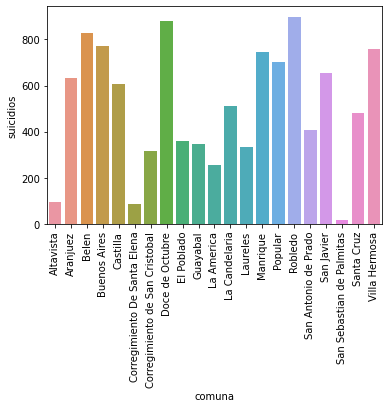

In [5]:
columnsc = ['comuna', 'suicidios'];
columnsb = ['barrio', 'suicidios'];
dfc = df[filtrosi][columnsc].groupby(by=['comuna']).sum();
dfb = df[filtrosi][columnsb].groupby(by=['barrio']).sum();
dfc.reset_index(inplace=True);
dfb.reset_index(inplace=True);
dfb = dfb.sort_values(by=['suicidios'], ascending=False);
gc1 = sns.barplot(data=dfc, x='comuna', y='suicidios');
gc1.set_xticklabels(labels = dfc['comuna'], rotation = 90);

Las comunas que registran la mayor cantidad de suicidios son: Robledo, Doce de Octubre y Belen. En cambio, las comunas con menor cantidad de suicidios son: San Sebastián de Palmitas, Corregimiento de Santa Elena y Altavista.

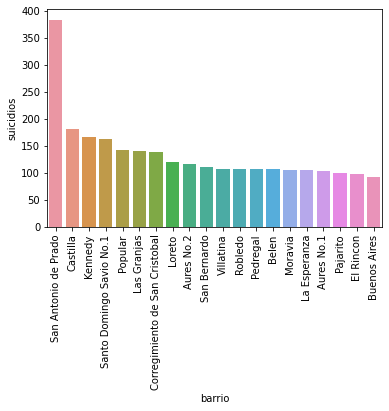

In [6]:
dfb_max = dfb.head(20);
gb1 = sns.barplot(data=dfb_max, x='barrio', y='suicidios');
gb1.set_xticklabels(labels = dfb_max['barrio'], rotation = 90);

Los 20 barrios mostrados son los que tienen mayor cantidad de suicidios. Se nota claramente que el barrio San Antonio de Prado es el barrio con mayor cantidad de suicidios. Además, se ve que todos estos barrios a escepción de San ANtonio de Prado tienen una cantidad de suicidios que ronda entre 100 y 200.

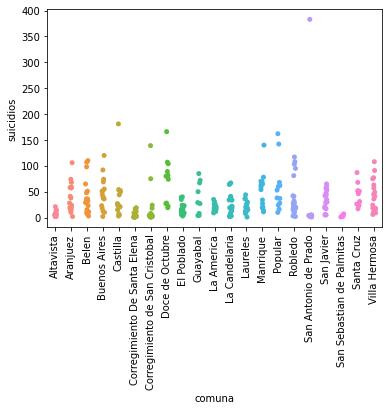

In [7]:
columnsbc = ['comuna', 'barrio', 'suicidios'];
dfbc = df[filtrosi][columnsbc].groupby(by=[df['comuna'], df['barrio']]).sum();
dfbc.reset_index(inplace=True);
gbc1 = sns.stripplot(data=dfbc, x='comuna', y='suicidios');
gbc1.set_xticklabels(labels = dfc['comuna'], rotation = 90);

Los barrios de las comunas en general presentan una tasa de suicidios similar, sin embargo en la comuna San Antonio de Prado a pesar de que casi todos sus barrios tienen pocos suicidios, hay uno que presenta casi 400. Algo parecido sucede en la comuna de Castilla y el Corregimiento de San Cristobal, aunque no de forma tan notoria.

## Suicidios Vs Tiempo

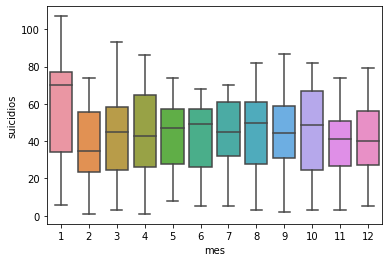

In [8]:
columnsbca = ['fecha','comuna', 'suicidios'];
dfbca = df[columnsbca].groupby(by=[df['fecha'].dt.month, 'comuna']).sum();
dfbca.reset_index(inplace=True);
dfbca.columns = ['mes', 'comuna', 'suicidios'];
sns.boxplot(data=dfbca, x='mes', y='suicidios');

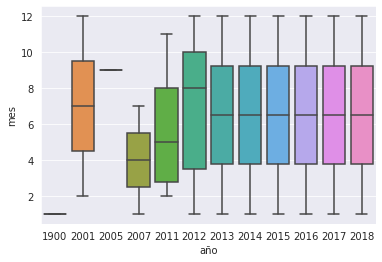

In [9]:
df_mes = df
columns = ['fecha', 'suicidios'];
groups = [fecha.dt.year, fecha.dt.month];

df_mes = df_mes[columns].groupby(groups).sum();

df_mes.index.names = ['año', 'mes'];
df_mes.reset_index(inplace=True);

sns.set_style(style='darkgrid');
sns.boxplot(data=df_mes, x='año', y='mes');

En base al gráfico se puede notar que en el mes de Enero se presenta la mayor variabilidad en los suicidios. En cambio, el mes que presenta una menor variabilidad es el mes de Junio. 

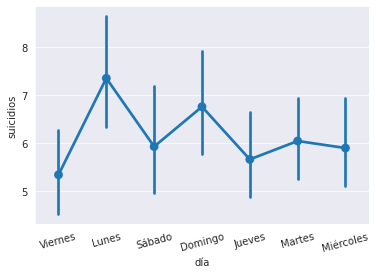

In [10]:
columnsfb = ['fecha', 'barrio', 'suicidios'];
dfmb = df[columnsfb].groupby(by=[df['fecha'].dt.day_name(), 'barrio']).sum();
dfmb.reset_index(inplace=True);
dfmb.columns = ['día', 'barrio', 'suicidios'];
lp=sns.pointplot(data=dfmb, x='día', y='suicidios');
dias = ['Viernes', 'Lunes', 'Sábado', 'Domingo', 'Jueves', 'Martes', 'Miércoles'];
lp.set_xticklabels(labels =dias , rotation = 15);

El gráfico muestra que el viernes es el día de la semana. con menor cantidad de suicidios en general. Por el contrario, el lunes es el día de la semana que se tiene una mayor cantidad de suicidios. Además, todos los días de la semana presentan una variabilidad bastante similar con respecto a los barrios en los que suceden.

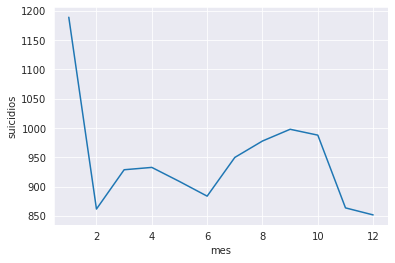

In [11]:
columnsf = ['fecha', 'suicidios'];
dfy = df[columnsf].groupby(by=[df['fecha'].dt.month]).sum();
dfy.reset_index(inplace=True);
dfy.columns = ['mes', 'suicidios'];
sns.lineplot(data=dfy, x='mes', y='suicidios');

Del gráfico podemos concluir que el mes de enero es el que tiene mayor cantidad de suicidios con mucha diferencia respecto al resto, presentando casi 1200 suicidios. Sin embargo, los meses de febrero, noviembre y diciembre son los que presentan la menor cantidad de suicidios, habiendo poco más de 850. Durante el resto del año, los suicidios se mantienen entre 850 y 1000.

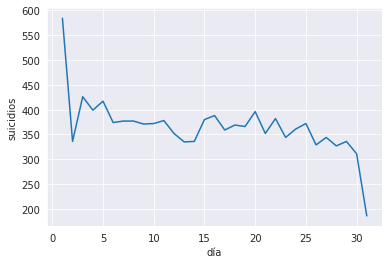

In [12]:
columnsf = ['fecha', 'suicidios'];
dfy = df[columnsf].groupby(by=[df['fecha'].dt.day]).sum();
dfy.reset_index(inplace=True);
dfy.columns = ['día', 'suicidios'];
sns.lineplot(data=dfy, x='día', y='suicidios');

Durante el primer día del mes es cuando hay una mayor cantidad de suicidios. Posterior a ese día, la tasa de suicidios se mantiene entre los 350 y 450. El día con menor tasa de suicidios es el 31, pero esto puede deberse a que hay meses que no tienen 31 días.



## Edad vs Suicidios (Hue set to 'Sexo')

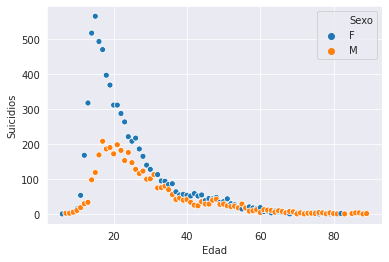

In [13]:
columnse = ['edad', 'sexo', 'suicidios'];
dfy = df[columnse].groupby(by=['edad', 'sexo']).sum();
dfy.reset_index(inplace=True);
dfy.columns = ['Edad', 'Sexo', 'Suicidios'];
sns.scatterplot(data=dfy, x='Edad', y='Suicidios', hue='Sexo');

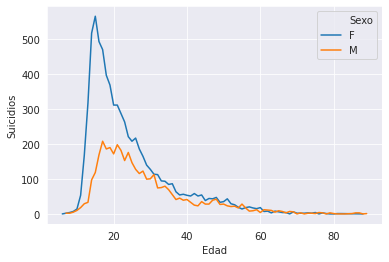

In [14]:
sns.lineplot(data= dfy, x= 'Edad',y = 'Suicidios', hue= 'Sexo');

De los gráficos se concluye que el género femenino presenta una mayor tasa de suicidio que el género masculino antes de los 40 años. Donde más se nota esta diferencia es alrededor de los 20 años, ya que las mujeres presentaron casi 300 suicidios más que los hombres. Además, rondando esta edad es donde mayor cantidad de suicidios en general se presentan. 

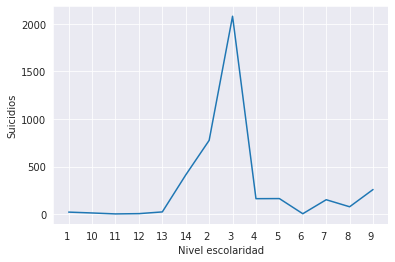

In [15]:
dfnm = df[filtrosd][['escolaridad','suicidios']].groupby(by='escolaridad').sum();
dfnm.reset_index(inplace=True);
dfnm.columns = ['Nivel escolaridad', 'Suicidios'];
sns.lineplot(data=dfnm, x='Nivel escolaridad', y='Suicidios');

## Modelo Regresión Logística

In [60]:
columnsmrl = ['comuna','sexo', 'escolaridad'];
dfmrl = df[filtrosi][filtrosd][columnsmrl];
dfnew = pd.get_dummies(data=dfmrl,columns=['sexo', 'comuna', 'escolaridad'], drop_first=True);
#dfnew.columns=['comuna', 'edad', 'escolaridad', 'femenino', 'masculino'];
dfnew

<ipython-input-60-b92f405f4a72>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfmrl = df[filtrosi][filtrosd][columnsmrl];


,sexo_M,comuna_Aranjuez,comuna_Belen,comuna_Buenos Aires,comuna_Castilla,comuna_Corregimiento De Santa Elena,comuna_Corregimiento de San Cristobal,comuna_Doce de Octubre,comuna_El Poblado,comuna_Guayabal,...,escolaridad_13,escolaridad_14,escolaridad_2,escolaridad_3,escolaridad_4,escolaridad_5,escolaridad_6,escolaridad_7,escolaridad_8,escolaridad_9
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2049,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2050,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2051,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8308,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8311,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
X = dfnew.iloc[:, 1:].values;
y = dfnew.iloc[:, 0].values;

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [62]:
Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.3,random_state=100);


In [64]:
log_model = LogisticRegression(max_iter=1000);
log_model_fit = log_model.fit(Xt,yt); 
score_log_model = log_model_fit.score(Xv,yv);
print(log_model_fit.predict_proba(Xv))
print(f'Score LOGIT {score_log_model}')

[[0.61771686 0.38228314]
 [0.70022606 0.29977394]
 [0.66502247 0.33497753]
 ...
 [0.61009207 0.38990793]
 [0.66179498 0.33820502]
 [0.60415149 0.39584851]]
Score LOGIT 0.640343347639485


In [68]:
Xv[0, :]
print(dfnew.columns[12])
    

comuna_Laureles


In [31]:
svc_model = SVC();
svc_model_fit = svc_model.fit(Xt,yt); #Training 
score_svc_model = svc_model_fit.score(Xv,yv);

print(f'Score SVC {score_svc_model}')

Score SVC 0.10472103004291845


In [55]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,100),activation='tanh',max_iter=1000);
mlp_model_fit = mlp_model.fit(Xt,yt);
mlp_score = mlp_model_fit.score(Xv,yv);
print(f'MLP Score {mlp_score}');

MLP Score 0.0927038626609442


In [53]:
columnsmrl2 = ['edad','sexo','escolaridad'];
dfmrl2 = df[filtrosi][filtrosd][columnsmrl2];
dfnew2 = pd.get_dummies(data=dfmrl2,columns=['comuna','sexo']);
#dfnew2.columns=['edad', 'escolaridad', 'Altavista', 'Aranjuez', 'Belen', 'Buenos Aires', 'Castilla', 'C_Santa Elena', 'C_San Cristobal', 'Doce de Octubre', 'El Poblado', 'Guayabal', 'La America', 'La Candelaria', 'Laureles', 'Manrique', 'Popular', 'Robledo', 'San Antonio de Prado', 'San Javier', 'San Sebastian de Palmitas', 'Santa Cruz', 'Villa Hermosa', 'femenino', 'masculino'];
dfnew2

<ipython-input-53-36f828ca24a0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfmrl2 = df[filtrosi][filtrosd][columnsmrl2];


KeyError: "['comuna'] not in index"

In [ ]:
X = dfnew2[['edad', 'escolaridad', 'Altavista', 'Aranjuez', 'Belen', 'Buenos Aires', 'Castilla', 'C_Santa Elena', 'C_San Cristobal', 'Doce de Octubre', 'El Poblado', 'Guayabal', 'La America', 'La Candelaria', 'Laureles', 'Manrique', 'Popular', 'Robledo', 'San Antonio de Prado', 'San Javier', 'San Sebastian de Palmitas', 'Santa Cruz', 'Villa Hermosa', 'femenino', 'masculino']].values;
y = dfnew2['comuna'].values;

In [ ]:
Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.2,random_state=100);
mlp_model = MLPClassifier(hidden_layer_sizes=(10,10,10),activation='relu', max_iter=1000);
mlp_model_fit = mlp_model.fit(Xt,yt);
mlp_score = mlp_model_fit.score(Xv,yv);
print(f'MLP Score {mlp_score}');

In [ ]:
Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.4,random_state=100);
log_model = LogisticRegression(max_iter=10000);
log_model_fit = log_model.fit(Xt,yt); 
score_log_model = log_model_fit.score(Xv,yv);
print(f'Score LOGIT {score_log_model}')

# Mapa

## Crear instancia de geopanda


In [ ]:

import geopandas as gpd
shapefile = 'data/medellin/map-polygon.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['NOMBRE', 'IDENTIFICA', 'geometry']]
gdf.columns = ['nombre', 'index', 'geometry']
gdf

